## Машинное обучение 1, ММП ВМК МГУ

## Семинар 1

## Машинное обучение: основные понятия

### Задача машинного обучения - написать алгоритм, способный самостоятельно обучаться и  настраиваться на решение конкретной задачи.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
x_train = np.sort(np.random.rand(50))*10 - 5
y_train = x_train**2
x_train += 18
y_train += 128.5

In [3]:
x_train, y_train

(array([13.3086626 , 13.33574332, 13.41203692, 13.72115439, 13.92834359,
        14.21128857, 14.24039472, 14.42014219, 14.8122632 , 15.63391506,
        15.79792307, 16.21915425, 16.44823462, 16.57791932, 17.15789531,
        17.86701079, 17.93525565, 18.11979882, 18.13490591, 18.15409788,
        18.16515137, 18.17265749, 18.28186834, 18.58861008, 18.70097394,
        19.3317504 , 19.41635887, 19.58210101, 19.69556604, 19.78520755,
        20.19240365, 20.30024077, 20.44154991, 20.86502704, 20.94652397,
        21.15919253, 21.20080828, 21.25394094, 21.53980468, 21.65232751,
        21.6704985 , 21.71905968, 21.75998462, 21.78725759, 22.04856095,
        22.10515414, 22.57398638, 22.70548488, 22.79837775, 22.93701094]),
 array([150.50864663, 150.25529041, 149.54940523, 146.80851977,
        145.07838592, 142.85433433, 142.63463188, 141.31538195,
        138.66166589, 134.09835793, 133.34914283, 131.67141158,
        130.90797578, 130.52231347, 129.2091403 , 128.51768613,
        128.

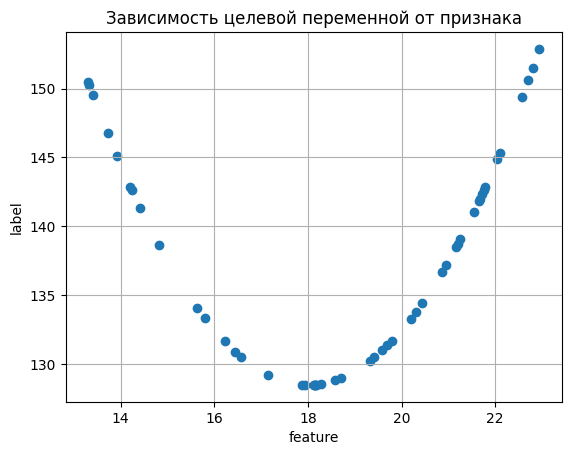

In [4]:
plt.scatter(x_train, y_train)
plt.xlabel('feature')
plt.ylabel('label')
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

In [ ]:
x_test = np.array([0, 21, 26, -15.7])

y_test = ?

-

-

-

-

-

-

-

-

-

-

#### Простое решение - использовать силу матана!

Пусть уравнение параболы $ y = ax^2 + bx + c$

Выбираем 3 точки, подставляем и решаем СЛАУ.

**Или**

Известно что x - координата вершины равняется $\frac{-b}{2a}$

Случайно выбираем 2 точки, подставляем и решаем СЛАУ.

**Или**

 Любой другой метод.

 В любом случае, еси вы смогли его запрограммировать, то поздравляю. Вы написали алгоритм машинного обучения!

#### **Пример простой но удовлетворяет всем "критериям" задачи ML**

Есть обучающая выборка X_train, Y_train, содержащая информацию о прецедентах.

Есть программа, которая на основании этих прецедентов настраивает свои внутренние параметры.

####Теперь усложним задачу. Пусть данные зашумлены.

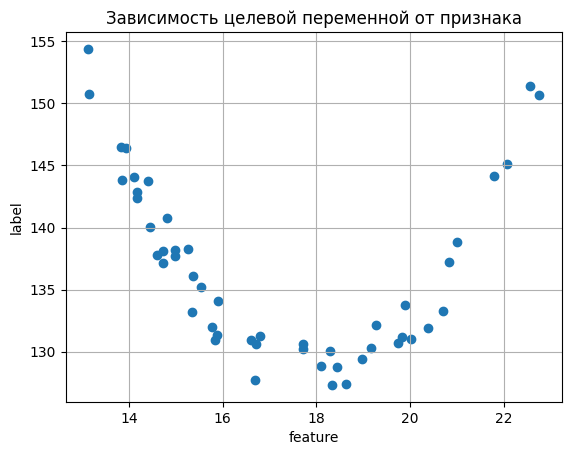

In [ ]:
x_train = np.sort(np.random.rand(50))*10 - 5
y_train = x_train**2
x_train += 18
y_train += (np.random.rand(50)*5 - 2.5)
y_train += 128.5
plt.scatter(x_train, y_train)
plt.xlabel('feature')
plt.ylabel('label')
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

Теперь мы не можем точно решить задачу. Можем лишь аппроксимировать решение с определенной точностью. Функция, по которой измеряется точность модели называется **функционал качества**. Она может быть подобрана, исходя из задачи.

Вариант решения: надо аппроксимировать полиномом с минимальным квадратичным отклонением от обучающей выборки. Ниже реализована программа для аппроксимации.

In [ ]:
def f1(x):
  ret = 0
  coefs = np.ones(3)
  x = np.array([x])
  pows = np.arange(coefs.shape[0])
  return ((x[:, np.newaxis]**pows[np.newaxis, :])*coefs[np.newaxis, :]).sum()

In [ ]:
def f(x, coefs):
  ret = 0
  pows = np.arange(coefs.shape[0])
  return ((x[:, np.newaxis]**pows[np.newaxis, :])*coefs[np.newaxis, :]).sum(1)

In [ ]:
def train_f(N, pow, x_train, y_train, lr, initial):
  coefs = initial#np.ones(pow)#random.rand
  grad = 0
  for i in range(N):
    print(i, ((f(x_train, coefs) - y_train)**2).mean())
    a = f(x_train, coefs)
    #print(2*(a - y_train)[np.newaxis, :])
    grad = 2*(a - y_train)[np.newaxis, :]*(x_train[np.newaxis, :]**np.arange(pow)[:, np.newaxis])
    grad = grad.sum(1)/x_train.shape[0]
    lambdas = minimize(lambda lam: ((f(x_train, coefs-grad*lam) - y_train)**2).sum(), np.zeros_like(coefs))['x']
#    print(lambdas)
    coefs -= grad*lambdas*lr
    #lr /= 2
    #print('lr = ', lr)
  return coefs

In [ ]:
#f(x_train, np.ones(3)) - y_train

#### Предположим что мы не знаем что это парабола. Наша задача - аппроксимировать множество точек полиномом какой-то степени. Степень подбираем самостоятельно. Параметры модели, которые инженер машинного обучения подбирает сам (то есть, они НЕ настраиваются в процессе обучения) называются **ГИПЕРПАРАМЕТРЫ**. Степень полинома в данном случае - гиперпараметр.

In [ ]:
coefs = train_f(5000, 1, x_train, y_train, 0.1, np.zeros(1)) #0.001 норм

0 18713.83789776305
1 11994.624043705393
2 7694.327177108487
3 4942.137182486469
4 3180.735585928379
5 2053.4385641312015
6 1331.968470181008
7 870.2276100528841
8 574.7134595708848
9 385.5844032624051
10 264.54180722497796
11 187.07454576102452
12 137.49549842409434
13 105.76490812845913
14 85.45733033925275
15 72.46048055416061
16 64.14249669170162
17 58.81898701972776
18 55.411940829664516
19 53.23143126802403
20 51.83590514857415
21 50.94276843212622
22 50.37116093359952
23 50.00533213454244
24 49.77120170314593
25 49.62135822705213
26 49.525458402352115
27 49.46408251454409
28 49.42480194634697
29 49.39966238270081
30 49.38357306196726
31 49.373275896697784
32 49.36668571092534
33 49.36246799203095
34 49.35976865193856
35 49.35804107427943
36 49.356935424577586
37 49.3562278087684
38 49.35577493465052
39 49.35548509521508
40 49.3552995979764
41 49.35518087974364
42 49.355104900074664
43 49.35505627308655
44 49.35502515181413
45 49.35500523419978
46 49.354992486926605
47 49.3549843

In [ ]:
coefs

array([136.82550734])

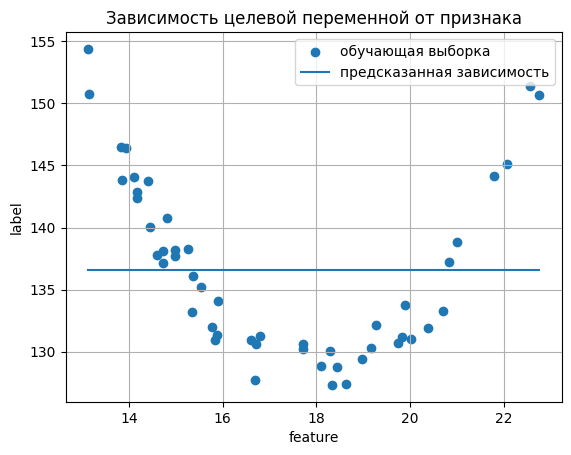

In [ ]:
plt.scatter(x_train, y_train, label='обучающая выборка')
plt.plot(x_train, f(x_train, coefs), label='предсказанная зависимость')
plt.xlabel('feature')
plt.ylabel('label')
plt.legend()
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

Мы просто аппроксимировали все точки оптимальной константой. Оптимальная константа при минимизации MSE - среднее.

In [ ]:
y_train.mean()

136.82590354851197

Модель недообучилась из-за своей неспособности подстроиться под сложные данные. Ситуация, когда модель по каким-то причинам(маленькая выборка, простая модель, недостаточно эпох обучения) не смогла выучить структуру данных **и выдает большую ошибку на обучении** называется **недообучение**.

In [ ]:
coefs = train_f(500, 2, x_train, y_train, 0.1, np.zeros(2)) #0.001 норм

0 18791.424916621178
1 15233.991586696291
2 12352.470021860114
3 10018.4371322259
4 8127.870091467183
5 6596.510464474034
6 5356.108927044216
7 4351.383479366001
8 3537.5557080878657
9 2878.3550856561087
10 2344.402479375527
11 1911.9007803919492
12 1561.574331581146
13 1277.8098542702041
14 1047.960582412562
15 861.7826314125189
16 710.9784636807218
17 588.8270618995779
18 489.8844075899168
19 409.74084122040034
20 344.82454059135875
21 292.2423270954081
22 249.6507260389603
23 215.15152141204024
24 187.20716047217232
25 164.57222466151745
26 146.2379224909123
27 131.38713448330452
28 119.35799450059383
29 109.61438859616625
30 101.72206592469874
31 95.32928371372141
32 90.15112876719876
33 85.95682254300844
34 82.55943390355255
35 79.8075487805843
36 77.57852140277286
37 75.77300849183096
38 74.31054276838567
39 73.12594535492074
40 72.16642134018748
41 71.38920671950754
42 70.75966284629419
43 70.24973217505975
44 69.83668835144964
45 69.50212255630275
46 69.23112457064741
47 69.011

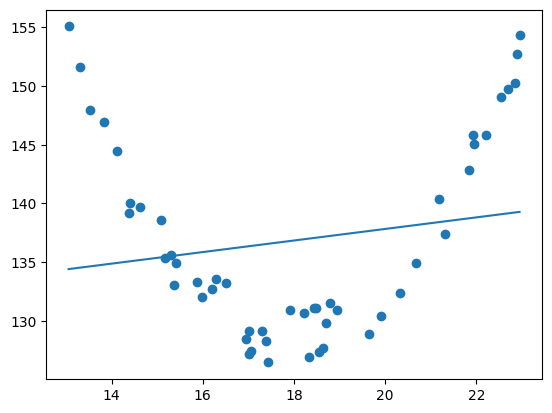

In [ ]:
plt.scatter(x_train, y_train, label='обучающая выборка')
plt.plot(x_train, f(x_train, coefs), label='предсказанная зависимость')
plt.xlabel('feature')
plt.ylabel('label')
plt.legend()
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

In [ ]:
coefs = train_f(500, 3, x_train, y_train, 0.1, np.zeros(3)) #0.001 норм

0 18791.424916621178
1 15242.826210231122
2 12365.843581032106
3 10032.918858319976
4 8140.800082439478
5 6605.907901660451
6 5360.583951765323
7 4350.051577179598
8 3529.9542883807826
9 2864.3620019229966
10 2324.1576682140494
11 1885.7330362119972
12 1529.9361193239158
13 1241.2224627348123
14 1006.9710661955806
15 816.9320775838936
16 662.7805600329823
17 537.7551119267421
18 436.36461257982626
19 354.15034064511434
20 287.4923105691808
21 233.45224032914226
22 189.64544047883922
23 154.1368905478056
24 125.3567628870318
25 102.03164285913401
26 83.12872356564245
27 67.81043266882222
28 55.39763282735613
29 45.33965639919572
30 37.19013147192966
31 30.587192784387888
32 25.237504465907108
33 20.90334482228068
34 17.39350276656798
35 14.549122021583553
36 12.275460870250225
37 10.429003188863161
38 8.908491290124502
39 7.6773938405260616
40 6.687517128601152
41 5.888886849438861
42 5.24025366568996
43 4.713377949943741
44 4.285349782740816
45 3.93758047279526
46 3.654985557010123
47 

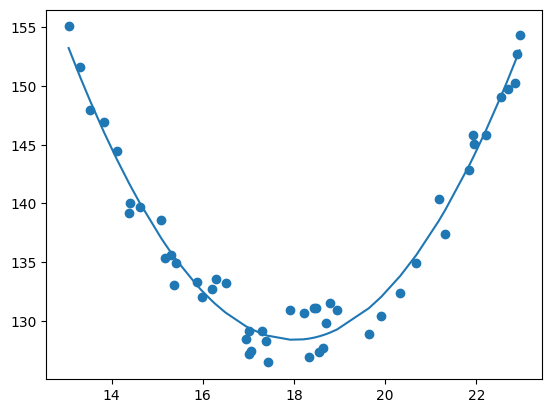

In [ ]:
plt.scatter(x_train, y_train, label='обучающая выборка')
plt.plot(x_train, f(x_train, coefs), label='предсказанная зависимость')
plt.xlabel('feature')
plt.ylabel('label')
plt.legend()
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

#### **В самый раз!**

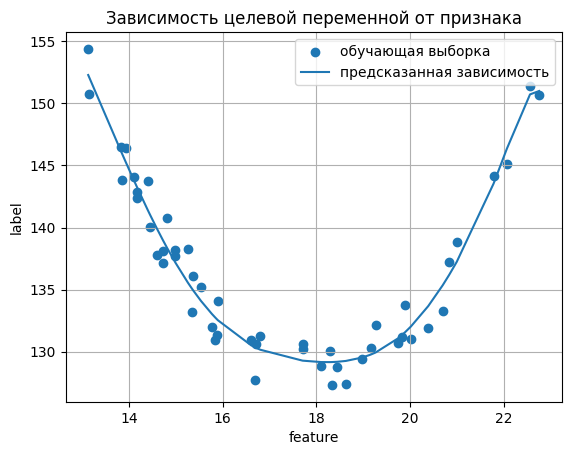

In [ ]:
from sklearn.linear_model import LinearRegression # импортируем линейную регрессию
from sklearn.preprocessing import PolynomialFeatures
X_objects = PolynomialFeatures(20).fit_transform(x_train[:, None])
regr = LinearRegression().fit(X_objects, y_train)
NewY = regr.predict(X_objects)

plt.scatter(x_train, y_train, label='обучающая выборка')
plt.plot(x_train, NewY, label='предсказанная зависимость')
plt.xlabel('feature')
plt.ylabel('label')
plt.legend()
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

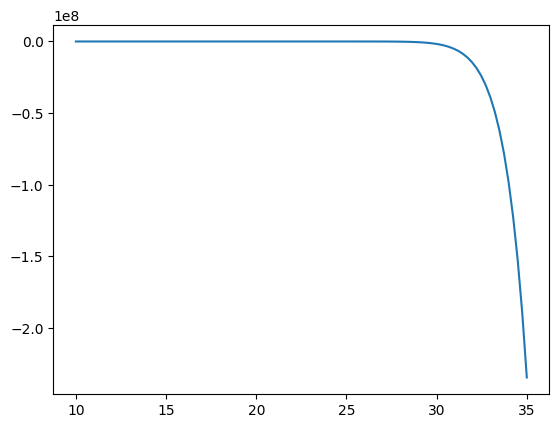

In [ ]:
X = np.linspace(10, 35, 100)
X_objects = PolynomialFeatures(20).fit_transform(X[:, None])
NewY = regr.predict(X_objects)

plt.scatter(x_train, y_train, label='обучающая выборка')
plt.plot(X, NewY, label='предсказанная зависимость')
plt.xlabel('feature')
plt.ylabel('label')
plt.legend()
plt.title('Зависимость целевой переменной от признака')
plt.grid()
plt.show()

Модель передообучилась из-за своей высокой сложности. Ситуация, когда модель по каким-то причинам(маленькая выборка, сложная модель, слишком много эпох обучения) слишком хорошо подстроилась под обучающую выборку и выдает очень маленькую ошибку на обучении, но не способна сделать верное предсказание на объектах, которые не входили в обучающую выборку называется **переобучение**.



## Работа с табличными данными

Решение любой задачи, связанной с машинным обучением, начинается с разведочного анализа данных. Перед тем, как строить модели, надо понять, сколько у нас данных и какая информация есть о каждом объекте, а также:
* выяснить, нет ли пропусков в данных (т.е. отсутствующих значений признаков у некоторых объектов)
* выяснить, нет ли выбросов (т.е. объектов, которые очень сильно отличаются от большинства, имеют неадекватные значения признаков)
* выяснить, нет ли повторов в данных
* выяснить, нет ли нелогичной информации (например, если мы анализируем данные по кредитам, и видим запись, где кредит выдали пятилетнему ребёнку, то это странно)

И это лишь небольшой список проблем, которые можно выявить. Помимо этого с данными нужно в целом познакомиться, чтобы понять, какие признаки там можно сделать, какие из них будут наиболее полезны. Обычно 80% времени специалисты тратят именно на подготовку и обработку данных.

Результатом разведочного анализа данных обычно является таблица, где каждый объект описывается набором интуитивно понятных признаков. Поэтому важно уметь работать с таблицами.


Попробуем провести разведочный анализ на реальной задаче предсказания продолжительности поездки на такси в Нью-Йорке: https://www.kaggle.com/c/nyc-taxi-trip-duration/overview

Для работы с таблицами в питоне есть специальная библиотека Pandas. Ее мы и будем использовать.

Полезные материалы по пандасу:

Полезные материалы:
1. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html)
2. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Чаще всего название библиотеки при импорте сокращают до "pd":

In [ ]:
import pandas as pd

### Распределение студентов по элективам

Разумно тренироваться на реальных сложных данных. А что может быть более сложным, чем данные, сгенерированные студентами?

Сегодня мы будем работать с анкетами студентов ПМИ 2017 и 2018 годов набора о том, на какие курсы по выбору они хотят попасть. Данные были анонимизированы: ФИО захешированы с солью, к рейтингам добавлен случайный шум.

*Вопрос: как можно деанонимизировать данные после манипуляций, которые мы проделали? А как бы вы предложили провести анонимизацию?*

У нас есть 2 таблицы (для 3 и 4 курса):

    – 'Timestamp': время получения ответов
    – 'ID': ID студента (может повторяться, если студент больше одного раза заполнял анкету)
    – 'Рейтинг': Кредитно-рейтинговая сумма студента (грубо говоря, сумма оценок студента по всем его дисциплинам с весами — чем дольша шла дисциплина, тем больше вес; подробности тут: https://www.hse.ru/studyspravka/rate/)
    – 'Группа (в формате 182)': Номер группы
    – 'МИ?': 1, если студент распределился на специализацию МИ, или NaN в противном случае (признак важен, поскольку студенты МИ берут осенью два курса по выбору, а студенты остальных специализаций только один)
    – 'Осенний курс по выбору, приоритет 1'
    – 'Осенний курс по выбору, приоритет 2'
    – 'Осенний курс по выбору, приоритет 3'
    – 'Весенний курс по выбору, приоритет 1'
    – 'Весенний курс по выбору, приоритет 2'
    – 'Весенний курс по выбору, приоритет 3'
    – 'Вы заполняете анкету в первый раз?': "Да" или "Нет"
   
Дополнительные столбцы для 4ого курса:
    
    – 'Группа (в формате 173)': Номер группы
    – 'blended-курс': Выбор blended-курса (кол-во мест неограничено)

Загрузим данные (обратите внимание, что мы легко читаем xlsx-файлы):

In [ ]:
!wget  -O 'data_3_course.xlsx' -q 'https://www.dropbox.com/s/ysxs5srafoyxknb/_data_3_course.xlsx?dl=1'
!wget  -O 'data_4_course.xlsx' -q 'https://www.dropbox.com/s/hfg2mzmvcivtxqk/_data_4_course.xlsx?dl=1'

In [ ]:
data3 = pd.read_excel('data_3_course.xlsx')
data4 = pd.read_excel('data_4_course.xlsx')

In [ ]:
data3

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,"704,0",181,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,"646,0",181,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,"624,0",185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,"579,0",182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,"632,0",183,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да
...,...,...,...,...,...,...,...,...,...,...,...,...
218,2020-05-20 11:49:38.801,bd416140ecdb32b6dbd7f40820bf63b1,"517,0",185,NaN,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Да
219,2020-05-20 11:57:07.326,e6f5eb76b34e7ab7bac753e6cb0a2279,"634,0",184,NaN,Теория баз данных,Безопасность компьютерных систем,Моделирование временных рядов,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,Да
220,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,"584,0",188,NaN,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,"646,0",186,NaN,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет


Посмотрим размер таблицы:

In [ ]:
data3.shape

(223, 12)

Для начала будем работать с одной таблицей для 3 курса. Теперь данные хранятся в переменной ```data3```, которая имеет тип [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):

In [ ]:
type(data3)

pandas.core.frame.DataFrame

DataFrame можно создать и вручную:

In [ ]:
df = pd.DataFrame({'AAA' : [4,5,6,7],
                   'BBB' : [10,20,30,40],
                   'CCC' : [100,50,'E',-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,E
3,7,40,-50


DataFrame можно частично отобразить в jupyter-ноутбуке с помощью методов ```head```(первые строки) и ```sample```(случайные строки):

In [ ]:
data3.tail(2)

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,"646,0",186,NaN,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет
222,2020-05-19 04:24:29.000,9d19b0d5f4fc8d7edc2258406f872c4e,"694,0",188,NaN,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,Компьютерные сети,Дискретная оптимизация,Численные методы,NaN


In [ ]:
dd = data3.sample(3)

In [ ]:
dd

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
68,2020-05-18 12:55:36.645,d61cc836b6aa3cdc4a40e2e8ada0b937,"671,0",182,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Машинное обучение 2,Нет
143,2020-05-18 21:36:30.617,2826fc94cd575c8f7b0a2416506e70e5,"613,0",185,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Дискретная оптимизация,Машинное обучение 2,Компьютерные сети,Да
46,2020-05-17 13:24:57.167,a37a88d97b12fe90dd83dd548866b2bb,"706,0",186,NaN,Сбор и обработка данных с помощью краудсорсинга,Безопасность компьютерных систем,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да


Можно немного залезть во внутренности Jupyter, чтобы отобразить сразу несколько таблиц:

In [ ]:
from IPython.display import display
display(data3.sample(3)), display(data3.sample(3))

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
75,2020-05-18 16:45:06.205,081eba3952cfc116e0e9b941d6a974a2,"692,0",182,NaN,Безопасность компьютерных систем,Матричные вычисления,Теория баз данных,Промышленное программирование на языке Java,Дискретная оптимизация,Системы баз данных,Нет
172,2020-05-18 22:35:46.073,ddea5295ac96e74f05982e47c7ab4ff4,"606,0",185,NaN,Моделирование временных рядов,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Машинное обучение 2,Анализ данных в бизнесе,Да
130,2020-05-18 21:12:29.736,ac4e2062ca444a506991c212bd2dd872,"562,0",187,NaN,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Анализ данных в бизнесе,Численные методы,Нет


,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
172,2020-05-18 22:35:46.073,ddea5295ac96e74f05982e47c7ab4ff4,"606,0",185,NaN,Моделирование временных рядов,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Машинное обучение 2,Анализ данных в бизнесе,Да
36,2020-05-16 21:43:04.275,d37fe725a8ee1d1b263463baf7560fd4,"750,0",184,NaN,Безопасность компьютерных систем,Теория баз данных,Высокопроизводительные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да
145,2020-05-18 21:38:00.271,b3e75ee2a708cef65cc2f80da894dd50,"560,0",187,NaN,Безопасность компьютерных систем,Моделирование временных рядов,Язык SQL,Анализ данных в бизнесе,Промышленное программирование на языке Java,Численные методы,Да


(None, None)

Если вам очень хочется отобразить все строки таблицы, то можно сделать так:

In [ ]:
# pd.options.display.max_rows = 999
# data3

In [ ]:
data3

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,"704,0",181,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,"646,0",181,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,"624,0",185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,"579,0",182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,"632,0",183,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да
...,...,...,...,...,...,...,...,...,...,...,...,...
218,2020-05-20 11:49:38.801,bd416140ecdb32b6dbd7f40820bf63b1,"517,0",185,NaN,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Да
219,2020-05-20 11:57:07.326,e6f5eb76b34e7ab7bac753e6cb0a2279,"634,0",184,NaN,Теория баз данных,Безопасность компьютерных систем,Моделирование временных рядов,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,Да
220,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,"584,0",188,NaN,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,"646,0",186,NaN,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет


DataFrame, по сути, является двумерной таблицей с набором полезных методов. Давайте рассмотрим некоторые из них.

```columns``` — возвращает названия колонок

```dtypes``` — типы колонок



In [ ]:
data3.columns

Index(['Timestamp', 'ID', 'Рейтинг', 'Группа (в формате 182)', 'МИ?',
       'Осенний курс по выбору, приоритет 1',
       'Осенний курс по выбору, приоритет 2',
       'Осенний курс по выбору, приоритет 3',
       'Весенний курс по выбору, приоритет 1',
       'Весенний курс по выбору, приоритет 2',
       'Весенний курс по выбору, приоритет 3',
       'Вы заполняете анкету в первый раз?'],
      dtype='object')

In [ ]:
data3.dtypes

Timestamp                               datetime64[ns]
ID                                              object
Рейтинг                                         object
Группа (в формате 182)                           int64
МИ?                                            float64
Осенний курс по выбору, приоритет 1             object
Осенний курс по выбору, приоритет 2             object
Осенний курс по выбору, приоритет 3             object
Весенний курс по выбору, приоритет 1            object
Весенний курс по выбору, приоритет 2            object
Весенний курс по выбору, приоритет 3            object
Вы заполняете анкету в первый раз?              object
dtype: object

В DataFrame есть несколько способов для обращения к строкам, столбцам и отдельным элементам таблицы: квадратные скобки и методы ```loc```, ```iloc```.

Как обычно, лучший источник знаний об этом — [документация](https://pandas.pydata.org/docs/user_guide/indexing.html).
Ниже краткое содержание.

В метод ```loc``` можно передать значение индекса (число, которое стоит в колонке index) строки, чтобы получить эту строку:

In [ ]:
#data3[2]

In [ ]:
data3.loc[2]

Timestamp                                     2020-05-15 03:12:41.480000
ID                                      30f3653fc176d54e89ac3179c455c6dd
Рейтинг                                                            624,0
Группа (в формате 182)                                               185
МИ?                                                                  NaN
Осенний курс по выбору, приоритет 1     Безопасность компьютерных систем
Осенний курс по выбору, приоритет 2                 Матричные вычисления
Осенний курс по выбору, приоритет 3        Моделирование временных рядов
Весенний курс по выбору, приоритет 1              Дискретная оптимизация
Весенний курс по выбору, приоритет 2                 Машинное обучение 2
Весенний курс по выбору, приоритет 3                    Численные методы
Вы заполняете анкету в первый раз?                                    Да
Name: 2, dtype: object

Получили отдельную строчку в виде объекта класса [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html):

In [ ]:
type(data3.loc[2])

pandas.core.series.Series

А с помощью срезов можно выбрать часть таблицы:

In [ ]:
data3.loc[2:4]

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,"624,0",185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,"579,0",182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,"632,0",183,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да


Срез в ```loc``` производится по index и включает в себя последний элемент.

Метод ```iloc``` действует похожим образом, но он индексирует элементы не по index, а по порядку в таблице (который может отличаться от index). Например:

In [ ]:
subset = data3.sample(5)
subset

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,"624,0",185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да
31,2020-05-16 17:44:55.307,7df351e9f3a719f6c29e811e2578fcc6,"637,0",188,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Системы баз данных,Машинное обучение 2,Да
85,2020-05-18 17:32:12.074,651f2fa7d270b436246ddd7d05880bfa,"755,0",182,NaN,Теория баз данных,Моделирование временных рядов,Statistical Learning Theory,Дополнительные главы прикладной статистики,Численные методы,Системы баз данных,Да
190,2020-05-18 23:31:33.712,7e844607673355cefa63252f558b69cb,"673,0",181,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Теория баз данных,Компьютерные сети,Системы баз данных,Промышленное программирование на языке Java,Да
206,2020-05-18 23:59:29.314,f7f123322f77fd451a30ed4979c323fc,"595,0",185,NaN,Язык SQL,Безопасность компьютерных систем,Теория баз данных,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Нет


In [ ]:
subset.loc[2:85]

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,"624,0",185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да
31,2020-05-16 17:44:55.307,7df351e9f3a719f6c29e811e2578fcc6,"637,0",188,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Системы баз данных,Машинное обучение 2,Да
85,2020-05-18 17:32:12.074,651f2fa7d270b436246ddd7d05880bfa,"755,0",182,NaN,Теория баз данных,Моделирование временных рядов,Statistical Learning Theory,Дополнительные главы прикладной статистики,Численные методы,Системы баз данных,Да


Если же вызвать просто ```loc```[2], то получим ошибку:


In [ ]:
# subset.loc[2]

С помощью ```iloc``` тоже можно делать срезы, но в них последний элемент не включается (как и в обычных срезах в Python, **в отличие от loc**):

In [ ]:
data3.iloc[2:4]

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,"624,0",185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,"579,0",182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да


Срезы можно брать не только по строкам, но и по столбцам. Обратите внимание на различия индексации столбцов в ```loc``` и ```iloc```:

In [ ]:
data3.columns

Index(['Timestamp', 'ID', 'Рейтинг', 'Группа (в формате 182)', 'МИ?',
       'Осенний курс по выбору, приоритет 1',
       'Осенний курс по выбору, приоритет 2',
       'Осенний курс по выбору, приоритет 3',
       'Весенний курс по выбору, приоритет 1',
       'Весенний курс по выбору, приоритет 2',
       'Весенний курс по выбору, приоритет 3',
       'Вы заполняете анкету в первый раз?'],
      dtype='object')

In [ ]:
data3.iloc[2:4,2:6]

,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1"
2,"624,0",185,NaN,Безопасность компьютерных систем
3,"579,0",182,NaN,Statistical Learning Theory


In [ ]:
data3.loc[2:4, 'Рейтинг':'Осенний курс по выбору, приоритет 1']

,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1"
2,"624,0",185,NaN,Безопасность компьютерных систем
3,"579,0",182,NaN,Statistical Learning Theory
4,"632,0",183,NaN,Высокопроизводительные вычисления


Через квадратные скобки можно обращаться к одной или нескольким колонкам:

In [ ]:
data3['Рейтинг'].head(3)

0    704,0
1    646,0
2    624,0
Name: Рейтинг, dtype: object

In [ ]:
data3[['Рейтинг', 'Осенний курс по выбору, приоритет 1']].head(3)

,Рейтинг,"Осенний курс по выбору, приоритет 1"
0,"704,0",Язык SQL
1,"646,0",Высокопроизводительные вычисления
2,"624,0",Безопасность компьютерных систем


Есть и более интересные способы индексации. Например, давайте выберем студентов из группы 182:

In [ ]:
data3['Группа (в формате 182)'] == 182

0      False
1      False
2      False
3       True
4      False
       ...  
218    False
219    False
220    False
221    False
222    False
Name: Группа (в формате 182), Length: 223, dtype: bool

In [ ]:
data3[data3['Группа (в формате 182)'] == 182].sample(3)

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
80,2020-05-18 17:09:23.589,3e106aaef8b24dbb01319c73e14c2936,"784,0",182,NaN,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да
134,2020-05-18 21:17:01.633,f3cc62fabaa597e8fe0b20ac2e6f46d3,"741,0",182,NaN,Безопасность компьютерных систем,Язык SQL,Теория баз данных,Промышленное программирование на языке Java,Дискретная оптимизация,Компьютерные сети,Да
197,2020-05-18 23:43:04.866,4ab8340cfb08da86c14a2cc3c3fad908,"683,0",182,NaN,Statistical Learning Theory,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Промышленное программирование на языке Java,Анализ данных в бизнесе,Да


С DataFrame'ами и Series'ами одинаковой структуры можно производить математические операции:

In [ ]:
#strange_feature = data3['Рейтинг'] ** 2 + data3['Группа (в формате 182)']
#strange_feature.head()

Видимо, 'Рейтинг' представлен в виде строки. Исправим это:

In [ ]:
#data3['Рейтинг'].apply(lambda x: float(str(x).replace(',', '.')))

In [ ]:
#data3['Рейтинг'].apply(lambda x: float(str(x).replace(',', '.')))

#strange_feature = data3['Рейтинг'] ** 2 + data3['Группа (в формате 182)']
#strange_feature.head()

Получаем ту же ошибку, ведь метод apply не модифицирует таблицу, а просто возвращает новый столбец. Обходят это обычно так:

In [ ]:
data3['Рейтинг'] = data3['Рейтинг'].apply(lambda x: float(str(x).replace(',', '.')))

strange_feature = data3['Рейтинг'] ** 2 + data3['Группа (в формате 182)']
strange_feature.head()

0    495797.0
1    417497.0
2    389561.0
3    335423.0
4    399607.0
dtype: float64

В дальнейшем нам понадобится работать с перцентилями студентов. Чтобы сделать такой столбец, в pandas уже есть подходящий метод:

In [ ]:
data3['percentile'] = data3['Рейтинг'].rank() / data3.shape[0]

# добавим также наш странный признак
data3['new'] = strange_feature

При желании можно удалить любой признак при помоши метода ```drop```:

In [ ]:
data3 = data3.drop(columns=['new'])
data3.head()

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?,percentile
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,704.0,181,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.820628
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,646.0,181,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.495516
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624.0,185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.320628
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579.0,182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.123318
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,632.0,183,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.401345


### Разведочный анализ

Теперь изучим наши данные. Вашим домашним заданием будет распределение студентов по курсам, с учётом их предпочтений, рейтинга и ограничений. Начнём к этому готовиться.

Для начала посмотрим еще раз на типы данных и подумаем, надо ли их менять:

In [ ]:
data3.dtypes

Timestamp                               datetime64[ns]
ID                                              object
Рейтинг                                        float64
Группа (в формате 182)                           int64
МИ?                                            float64
Осенний курс по выбору, приоритет 1             object
Осенний курс по выбору, приоритет 2             object
Осенний курс по выбору, приоритет 3             object
Весенний курс по выбору, приоритет 1            object
Весенний курс по выбору, приоритет 2            object
Весенний курс по выбору, приоритет 3            object
Вы заполняете анкету в первый раз?              object
percentile                                     float64
dtype: object

Вроде бы нет...

А что с таблицей для 4ого курса? Как вы знаете, на ряд курсов студенты 3 и 4 годов обучения отбираются совместно, поэтому надо собрать данные в одну таблицу. *Можно ли это сделать без подготовки?*

In [ ]:
data3.head()

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?,percentile
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,704.0,181,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.820628
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,646.0,181,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.495516
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624.0,185,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.320628
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579.0,182,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.123318
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,632.0,183,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.401345


In [ ]:
data4.head()

,Timestamp,ID,Рейтинг,Группа (в формате 173),blended-курс,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
0,2020-05-14 20:23:21.662,d555d2805e1d93d4f023e57dc4c8f403,"995,0",172,DevOps,Безопасность компьютерных систем,Глубинное обучение в обработке звука,Байесовские методы машинного обучения,Компьютерное зрение,Обучение с подкреплением,Проектирование и разработка высоконагруженных ...,Да
1,2020-05-14 20:47:13.833,253bbe1a2021d0404712a1e4acd22939,"1105,0",176,DevOps,Безопасность компьютерных систем,Моделирование временных рядов,Statistical Learning Theory,Проектирование и разработка высоконагруженных ...,Численные методы,Методы сжатия и передачи медиаданных,Да
2,2020-05-14 20:52:42.734,881b1a6fda195b354ae2edb396a69f5d,"1083,0",172,DevOps,Безопасность компьютерных систем,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Генеративные модели в машинном обучении,Да
3,2020-05-14 21:03:02.916,5a9b8ac11ad05b39a58b0e04a263bf4c,"1169,0",171,DevOps,Глубинное обучение в обработке звука,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Обучение с подкреплением,Генеративные модели в машинном обучении,Да
4,2020-05-14 21:10:54.945,1bbbfae51794b83c769b634be8da7b8d,"1077,0",176,DevOps,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,Да


Кажется, рейтинги имеют разные распределения. Проверим это:

In [ ]:
data3['Рейтинг'].describe()

count    223.000000
mean     648.816143
std       58.255552
min      495.000000
25%      609.000000
50%      647.000000
75%      691.000000
max      784.000000
Name: Рейтинг, dtype: float64

In [ ]:
data4['Рейтинг'].describe()

count        138
unique       117
top       1085,0
freq           3
Name: Рейтинг, dtype: object

Да, рейтинг для 4 курса тоже надо привести к числовому типу.

In [ ]:
data4['Рейтинг'] = data4['Рейтинг'].apply(lambda x: float(str(x).replace(',', '.')))
data4['Рейтинг'].describe()

count     138.000000
mean     1155.188406
std        91.659203
min       963.000000
25%      1086.500000
50%      1155.500000
75%      1217.500000
max      1456.000000
Name: Рейтинг, dtype: float64

Видно, что квантили в самом деле отличаются — поэтому сами рейтинги не стоит использовать после объединения таблиц, надо работать только с перцентилями. Вычислим их и объединим таблицы с помощью метода ```concat```:

In [ ]:
data4['percentile'] = data4['Рейтинг'].rank() / data4.shape[0]


data = pd.concat([data3, data4])
data.head(2)

,Timestamp,ID,Рейтинг,Группа (в формате 182),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?,percentile,Группа (в формате 173),blended-курс
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,704.0,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.820628,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,646.0,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.495516,NaN,NaN


In [ ]:
data.shape

(361, 15)

Теперь для удобства переименуем столбцы (обратите внимание на ```inplace=True```):

In [ ]:
data.rename(columns={'Timestamp':'timestamp',
                     'ID':'id',
                     'Рейтинг':'rating',
                     'МИ?':'is_mi',
                     'Группа (в формате 182)':'18_group',
                     'Группа (в формате 173)':'17_group',
                     'Осенний курс по выбору, приоритет 1':'fall_1',
                     'Осенний курс по выбору, приоритет 2':'fall_2',
                     'Осенний курс по выбору, приоритет 3':'fall_3',
                     'Весенний курс по выбору, приоритет 1':'spring_1',
                     'Весенний курс по выбору, приоритет 2':'spring_2',
                     'Весенний курс по выбору, приоритет 3':'spring_3',
                     'Вы заполняете анкету в первый раз?':'is_first_time',
                     'blended-курс':'blended'},
           inplace=True)

Поскольку у (почти всех) столбцов теперь названия являются корректными именами переменных в Python, мы можем использовать ещё один способ обращения к столбцам таблицы как к полям класса:

In [ ]:
data.fall_1

0                                             Язык SQL
1                    Высокопроизводительные вычисления
2                     Безопасность компьютерных систем
3                          Statistical Learning Theory
4                    Высокопроизводительные вычисления
                            ...                       
133                        Statistical Learning Theory
134                  Анализ неструктурированных данных
135    Сбор и обработка данных с помощью краудсорсинга
136                   Безопасность компьютерных систем
137                  Анализ неструктурированных данных
Name: fall_1, Length: 361, dtype: object

Нередко работы с данными начинают с поиска пропущенных значений (NaN и др.) и их заполнения. Для начала посмотрим на их наличие:

In [ ]:
data.isna().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
dtype: int64

Видно, что тут содержательных пропусков нет — есть только проблемы с колонками, специфичными для одного из курсов.

Заполнять пропуски необходимо в соответствии со смыслом колонки. Можно заполнять с помощью среднего, медианного, константного или других значений. Для этого обычно используется метод ```fillna()``` с которым вы познакомитесь в домашнем задании.

Также для разведочного анализа может помочь метод ```groupby(column)```.

Он группирует объекты по указанной(-ым) колонке(-ам). Необходимо также указать какую статистику для группировки выводить. Это может быть количество (count), среднее (mean) или другие. Из огромной функциональности этого метода разберем только несколько базовых приемов:

In [ ]:
data.groupby('fall_1').count()[['id', 'is_mi']]

,id,is_mi
fall_1,,
Statistical Learning Theory,26,1
Анализ неструктурированных данных,32,0
Байесовские методы машинного обучения,17,0
Безопасность компьютерных систем,110,4
Высокопроизводительные вычисления,42,0
Глубинное обучение в обработке звука,12,0
Матричные вычисления,14,1
Моделирование временных рядов,24,7
Принятие решений в условиях риска и неопределённости,5,0


*Какие выводы вы можете сделать отсюда?*

Сделаем ```groupby``` с усреднением:

In [ ]:
data.groupby(by='fall_1').mean()

,rating,18_group,is_mi,percentile,17_group
fall_1,,,,,
Statistical Learning Theory,886.769231,183.428571,1.0,0.490706,173.000000
Анализ неструктурированных данных,1124.000000,NaN,NaN,0.412477,172.593750
Байесовские методы машинного обучения,1190.647059,NaN,NaN,0.613598,171.411765
Безопасность компьютерных систем,785.872727,184.481481,1.0,0.535848,174.413793
Высокопроизводительные вычисления,968.309524,184.055556,NaN,0.600555,174.958333
Глубинное обучение в обработке звука,1163.250000,NaN,NaN,0.539553,172.916667
Матричные вычисления,671.857143,183.357143,1.0,0.613069,NaN
Моделирование временных рядов,671.125000,184.869565,1.0,0.507908,175.000000
Принятие решений в условиях риска и неопределённости,762.600000,186.333333,NaN,0.188945,175.000000


Отсюда мы узнаём среднюю перцентиль для того или иного курса по выбору.
Обратите внимание, что средний рейтинг тут не очень показателен из-за разных его распределений у разных годов обучения.

Что выводится в следующей строке?

In [ ]:
data.groupby(by='fall_1').count()[['17_group', '18_group']].sum()

17_group    138
18_group    223
dtype: int64

Полезным бывает посмотреть на основные статистики по каждому *числовому*  признаку (столбцу). Метод ```describe``` позволяет быстро сделать это:

In [ ]:
data.describe()

,rating,18_group,is_mi,percentile,17_group
count,361.000000,223.000000,18.0,361.000000,138.000000
mean,842.387812,184.520179,1.0,0.502770,173.355072
std,256.919279,2.271701,0.0,0.289060,1.795374
min,495.000000,181.000000,1.0,0.004484,171.000000
25%,634.000000,183.000000,1.0,0.253623,172.000000
50%,702.000000,185.000000,1.0,0.502242,173.000000
75%,1107.000000,187.000000,1.0,0.753363,175.000000
max,1456.000000,188.000000,1.0,1.000000,177.000000


*Какие элементы таблицы выше могут быть полезны? Для чего?*

Студентам специализации МОП (машинное обучение и приложения) нельзя выбирать курс "Машинное обучение 2" в качестве весеннего курса по выбору. Давайте проверим, есть ли те, кто попытался:

In [ ]:
!wget  -O 'ml_students_anon.xlsx' -q 'https://www.dropbox.com/s/izc21kik0b8iw10/_ml_students_anon.xlsx?dl=0'

ml_students = pd.read_excel('ml_students_anon.xlsx')

Если вы знакомы с SQL, то знаете, что там крайне часто используется операция JOIN для соединения нескольких таблиц по тому или иному значению. В pandas такое тоже есть, функция называется ```merge```.

У нас есть две таблицы: (1) приоритеты студентов по элективам и (2) специализации, на которые распределены студенты. Эти таблицы содержат разную информацию про студентов, но в обеих конкретный студент имеет один и тот же ID. Допустим, мы теперь хотим соединить эти таблицы — то есть получить новую таблицу, в которой для каждого студента есть информация и о приоритетах по элективам, и о его специализации. Как раз для этого и понадобится операция ```merge```.

Идея соединения таблиц также отражена на картинке ниже.

<img src="https://i.imgur.com/WYyBFTE.png" style="width: 400px">

In [ ]:
data = data.merge(ml_students, on='id', how='left')

In [ ]:
data[(data['is_ml_student'] == True) &
     (
         (data['spring_1'] == 'Машинное обучение 2')
         |
         (data['spring_2'] == 'Машинное обучение 2')
         |
         (data['spring_3'] == 'Машинное обучение 2')
     )].head(2)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
20,2020-05-15 21:55:16.699,f0f6f3881894172a0f04e79b554b49e6,676.0,181.0,NaN,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,Машинное обучение 2,Численные методы,Дополнительные главы прикладной статистики,Да,0.663677,NaN,NaN,True
27,2020-05-16 13:02:24.706,5daee1bd98559bb2c52373e416942225,659.0,182.0,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Моделирование временных рядов,Машинное обучение 2,Промышленное программирование на языке Java,Анализ данных в бизнесе,Нет,0.556054,NaN,NaN,True


Попробуем понять, есть ли явная зависимость между рейтингом и номером группы. Для начала посмотрим на корреляции (функция corr считает по умолчанию корреляцию Пирсона):

In [ ]:
corrmat = data[['rating', '18_group', '17_group']].corr()
corrmat

,rating,18_group,17_group
rating,1.000000,-0.253637,0.013607
18_group,-0.253637,1.000000,NaN
17_group,0.013607,NaN,1.000000


*Проинтерпретируйте результаты. Можно ли им доверять, разумно ли смотреть на корреляции?*

Здесь числовых признаков не так много, но на практике их бывают десятки, а то и сотни. В таком случае бывает полезно посмотреть на эту матрицу корреляций в виде heatmap:

In [ ]:
# импорт библиотек для графиков
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

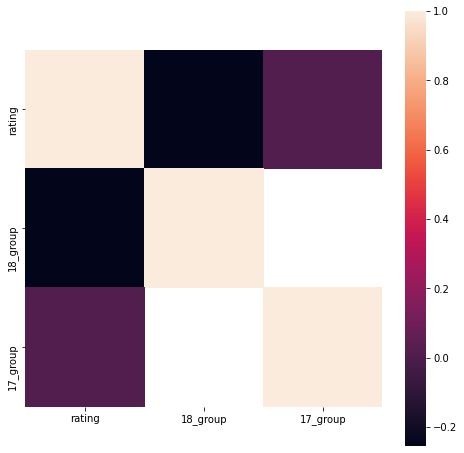

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(corrmat, square=True)
plt.show()

К графикам надо относиться серьёзно, они должны быть понятными и информативными. Рассмотрим несколько примеров.

*Прокомментируйте что вам кажется хорошим и плохим на данных графиках.*

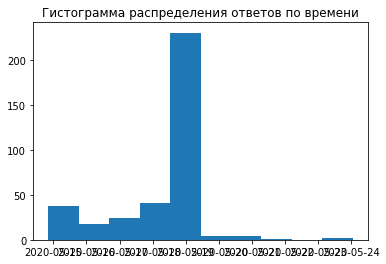

In [ ]:
plt.hist(data['timestamp'])
plt.title('Гистограмма распределения ответов по времени')
plt.show()

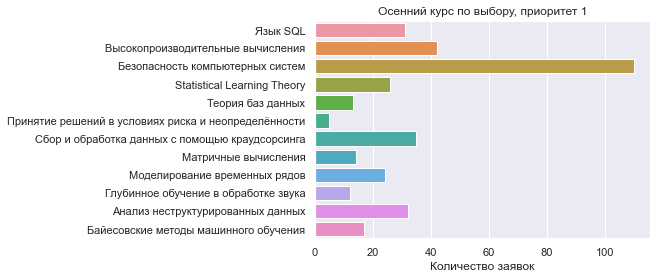

In [ ]:
sns.set()

fig, ax = plt.subplots()
ax = sns.countplot(y='fall_1', data=data)
ax.set_title('Осенний курс по выбору, приоритет 1')
ax.set_ylabel('')

ax.set(xlabel='Количество заявок')


plt.show()

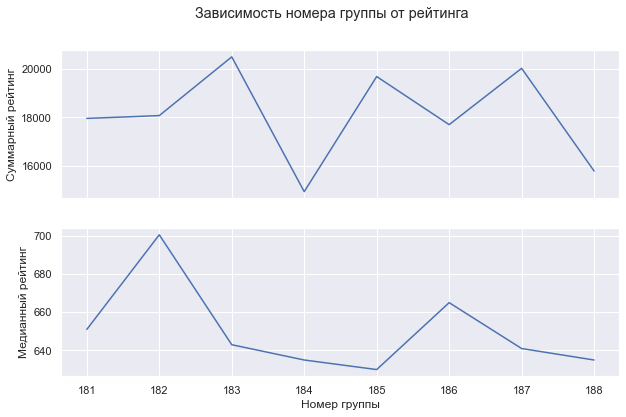

In [ ]:
crs3 = data[data['17_group'].isna()]
gr_raiting_med = crs3.groupby('18_group').median()['rating']
gr_raiting_sum = crs3.groupby('18_group').sum()['rating']

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
fig.suptitle('Зависимость номера группы от рейтинга')
#fig.text('Рейтинг')


axs[0].plot(gr_raiting_sum)
axs[0].set_ylabel('Суммарный рейтинг')

axs[1].plot(gr_raiting_med)
axs[1].set_ylabel('Медианный рейтинг')


plt.xlabel('Номер группы')

plt.show()

Если вы будете делать графики без подписанных осей, с налезающими друг на друга метками, неаккуратными линиями и т.д., то имеете все шансы попасть сюда: https://t.me/funny_homeworks

Сохраним полученную таблицу, чтобы вы могли продолжить с ней работу дома:

In [ ]:
data.to_excel('end_seminar.xlsx', index=False)

### Разведочный анализ данных

Рассказ во многом взят из ноутбука https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367/notebook

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns

Загрузим данные и изучим доступные нам признаки.

In [ ]:
!wget  -O 'train.csv' -q 'https://www.dropbox.com/s/en5f9nhn915cnkf/_train.csv?dl=0'

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

Смысл столбцов:

* id - идентификатор поездки
* vendor_id - код провайдера, от которого пришла информация о поездке
* pickup_datetime - время старта поездки
* dropoff_datetime - время окончания поездки
* passenger_count - число пассажиров (вводится водителем)
* pickup_longitude - долгота точки посадки
* pickup_latitude - широта точки посадки
* dropoff_longitude - долгота точки высадки
* dropoff_latitude - долгота точки высадки
* store_and_fwd_flag - равно Y, если информация о поездке какое-то время хранилась в памяти таксометра из-за отсутствия связи; иначе принимает значение N
* trip_duration - продолжительность поездки в секундах

In [ ]:
train.shape

(1458644, 11)

Данных довольно много, поэтому нужно задумываться об эффективности всех вычислений. Ниже мы увидим на примере, что правильное использование возможностей pandas позволит существенно ускорить вычисления.

Посмотрим внимательно на столбцы из нашей таблицы и попробуем проверить, нет ли там противоречий и проблем. Например, в голову приходят следующие вопросы:
* можно ли считать ID уникальным идентификатором поездки, или же есть записи с одинаковыми ID?
* есть ли где-то пропуски?
* действительно ли столбец store_and_fwd_flag принимает только значения Y и N?

In [ ]:
print('Id is unique.') if train.id.nunique() == train.shape[0] else print('oops')

Id is unique.


In [ ]:
print('We do not need to worry about missing values.') if train.count().min() == train.shape[0] else print('oops')

We do not need to worry about missing values.


In [ ]:
print('The store_and_fwd_flag has only two values {}.'.format(str(set(train.store_and_fwd_flag.unique()))))

The store_and_fwd_flag has only two values {'N', 'Y'}.


In [ ]:
train.store_and_fwd_flag

0          N
1          N
2          N
3          N
4          N
          ..
1458639    N
1458640    N
1458641    N
1458642    N
1458643    N
Name: store_and_fwd_flag, Length: 1458644, dtype: object

Посмотрим на типы данных в каждом столбце.

In [ ]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
train.pickup_datetime

0          2016-03-14 17:24:55
1          2016-06-12 00:43:35
2          2016-01-19 11:35:24
3          2016-04-06 19:32:31
4          2016-03-26 13:30:55
                  ...         
1458639    2016-04-08 13:31:04
1458640    2016-01-10 07:35:15
1458641    2016-04-22 06:57:41
1458642    2016-01-05 15:56:26
1458643    2016-04-05 14:44:25
Name: pickup_datetime, Length: 1458644, dtype: object

Видно, что pandas отнёс столбцы с датами к общему типу object. Будет лучше привести их к типу datetime, чтобы использовать удобные функции для манипуляций с датами. Заодно сделаем проверку — действительно ли столбец check_trip_duration показывает продолжительность поездки, или же он входит в противоречие со столбцами pickup_datetime и dropoff_datetime.

In [ ]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['pickup_date'] = train['pickup_datetime'].dt.date
train.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,2016-03-14


In [ ]:
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)
train['store_and_fwd_flag'] = 1 * (train.store_and_fwd_flag.values == 'Y')
train['check_trip_duration'] = (train['dropoff_datetime'] - train['pickup_datetime']).map(lambda x: x.total_seconds())
duration_difference = train[np.abs(train['check_trip_duration'].values  - train['trip_duration'].values) > 1]
print('Trip_duration and datetimes are ok.') if len(duration_difference[['pickup_datetime', 'dropoff_datetime', 'trip_duration', 'check_trip_duration']]) == 0 else print('Ooops.')

Trip_duration and datetimes are ok.


In [ ]:
#train.apply()

In [ ]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26,435.0


Ещё имеет смысл проверить целевую переменную trip_duration. Нет ли там выбросов? Какими по продолжительности бывают поездки? Выглядит ли распределение этой переменной осмысленно?

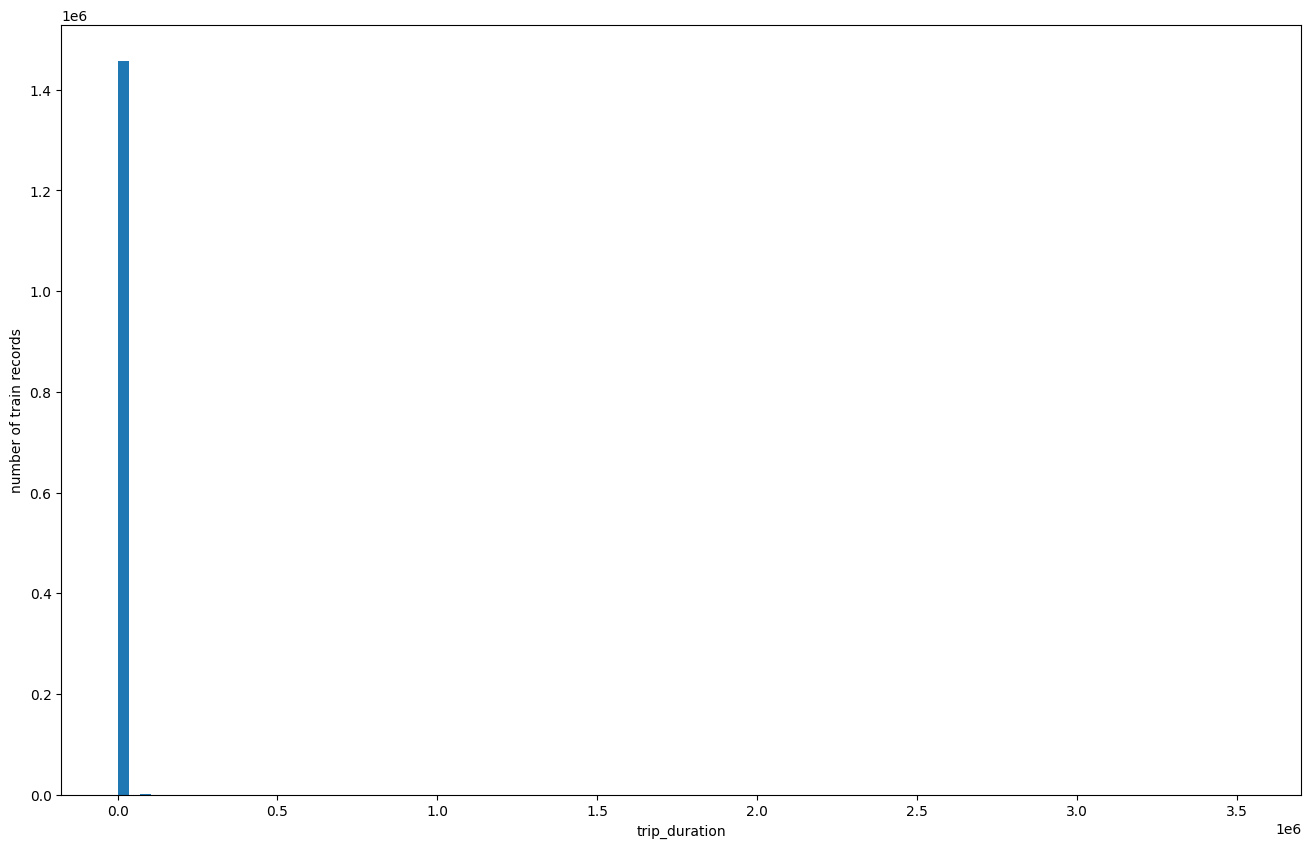

In [ ]:
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

Когда в каком-то столбце распределение имеет тяжёлые хвосты или есть выбросы, обычные гистограммы не очень информативны. В этом случае может быть полезно нарисовать распределение в логарифмической шкале.

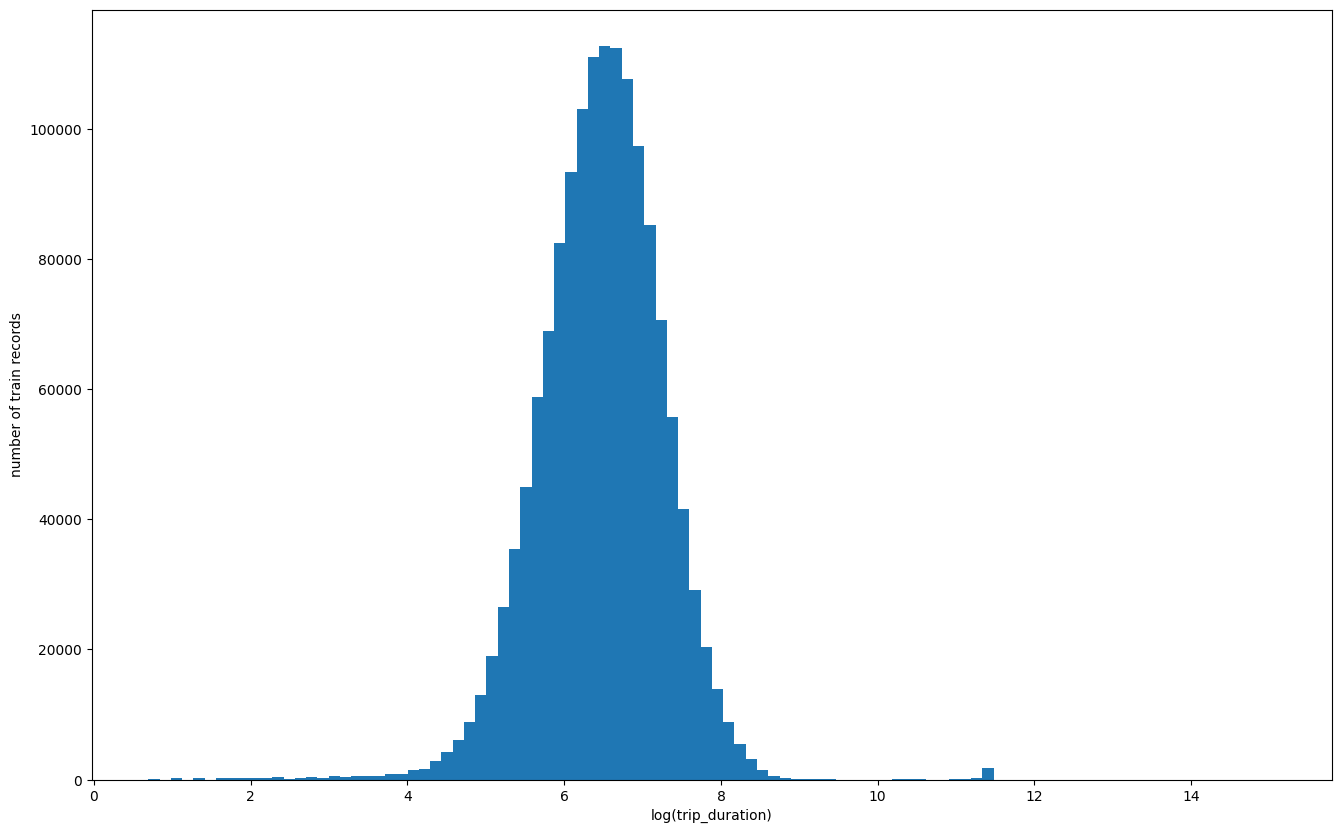

In [ ]:
train['log_trip_duration'] = np.log1p(train['trip_duration'].values)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

В целом распределение разумное, продолжительность поездки находится примерно в следующем интервале:

In [ ]:
print("В секундах:", np.exp(5), np.exp(9))
print("В минутах:", np.exp(5) // 60, np.exp(9) // 60)

В секундах: 148.4131591025766 8103.083927575384
В минутах: 2.0 135.0


Самая длинная поездка (в часах):

In [ ]:
train['trip_duration'].max() // 3600

979

In [ ]:
train[train.trip_duration >= 979 * 3600]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration,log_trip_duration
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,0,3526282,2016-02-13,3526282.0,15.075755


Это выброс. Мог сломаться таксометр, водитель мог забыть остановить поездку по каким-то причинам и т.д. В любом случае, будет странно обучаться на таких данных, обычно их выкидывают из выборки. Кандидатов на выбрасывание не так уж много — например, если взять поездки длиной 10 часа и больше, то их окажется около двух тысяч, и определённо надо выяснять, что это такое.

In [ ]:
train[train.trip_duration >= 10 * 3600]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration,log_trip_duration
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,0,84594,2016-02-20,84594.0,11.345630
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,0,86149,2016-05-07,86149.0,11.363845
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,0,86352,2016-06-07,86352.0,11.366199
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,0,86236,2016-02-13,86236.0,11.364855
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,0,85197,2016-03-18,85197.0,11.352733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455097,id2798196,2,2016-03-20 03:51:36,2016-03-21 00:00:00,2,-73.969299,40.757301,-73.870277,40.709808,0,72504,2016-03-20,72504.0,11.191411
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,0,86233,2016-02-08,86233.0,11.364820
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,0,85311,2016-06-08,85311.0,11.354070
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,0,86314,2016-02-02,86314.0,11.365759


Попробуем нарисовать, откуда обычно стартуют поездки.

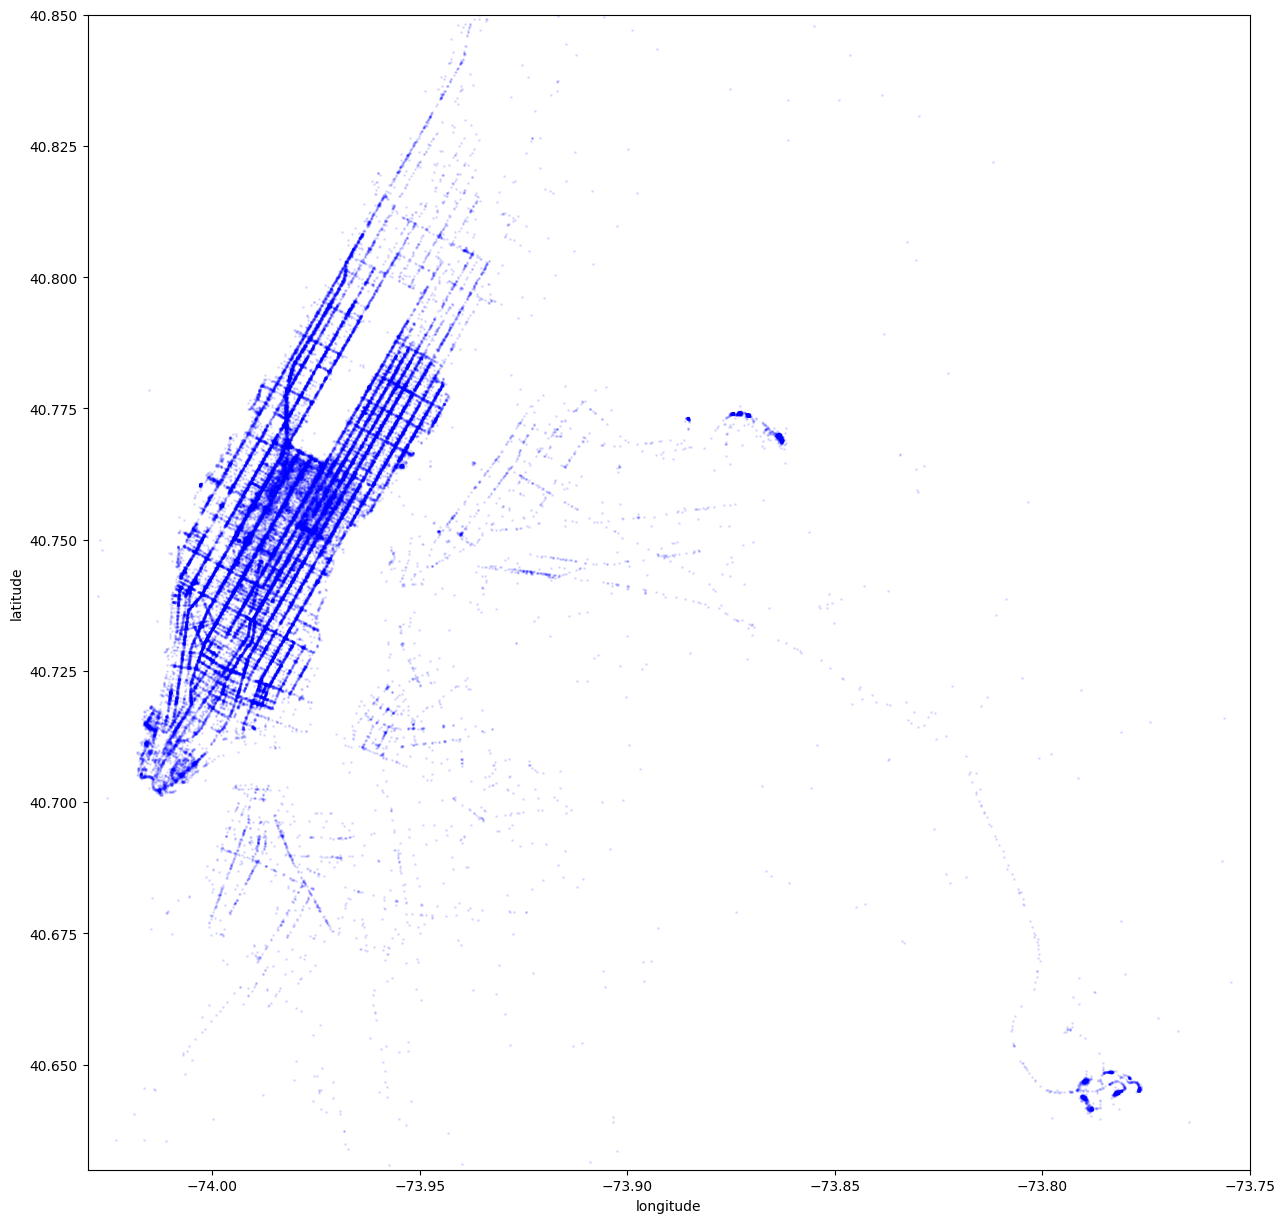

In [ ]:
N = 100000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

Теперь нарисуем как следует, на карте.

In [ ]:
#!pip  install ipyleaflet

In [ ]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [ ]:
show_circles_on_map(train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(center=[40.75303678512573, -73.97358015441894], controls=(ZoomControl(options=['position', 'zoom_in_text',…

Кстати, случайный ли порядок записей в таблице? Это важно понимать, например, для разбиения выборки на обучающую и тестовую части. Если порядок не является случайным, а мы отнесём к обучающей части первую половину таблицы, то есть риск, что данные в обучении и тесте будут иметь разные распределения, а значит, модель сможет хорошо работать только на одной из частей.

Text(0, 0.5, 'Дней с момента ранней поездки')

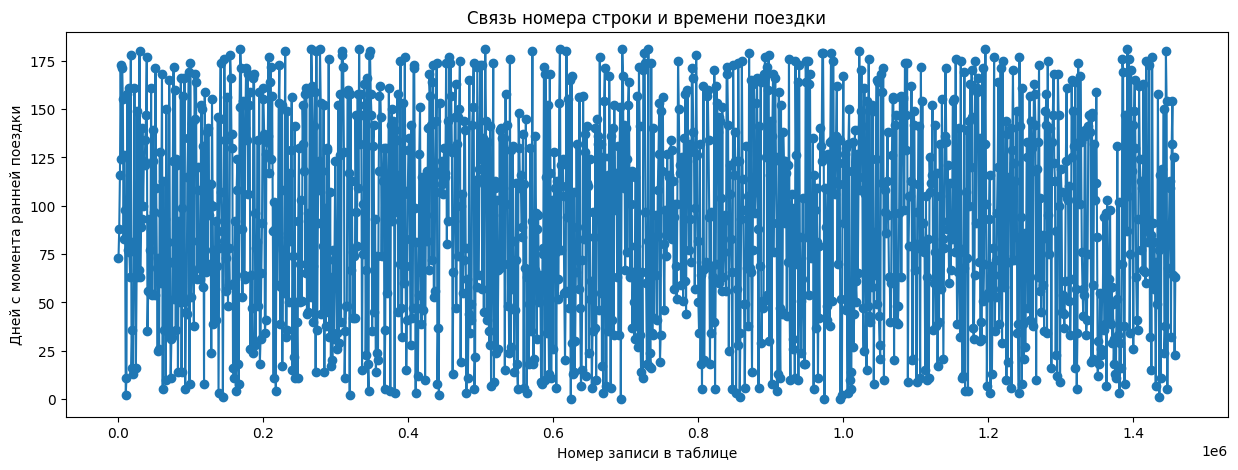

In [ ]:
plt.figure(figsize=(15,5))
days_since_min_ride = (train['pickup_datetime'] - train['pickup_datetime'].min()).apply(lambda x: x.total_seconds() // (60*60*24))
plt.plot(days_since_min_ride[::1000], 'o-')
plt.title('Связь номера строки и времени поездки')
plt.xlabel('Номер записи в таблице')
plt.ylabel('Дней с момента ранней поездки')

Вроде бы всё довольно случайно.

Посчитаем какие-нибудь признаки. Скорее всего продолжительность поездки неплохо зависит от расстояния — посчитаем его. Кстати, важно заметить, что само расстояние не может быть признаком, поскольку в тестовой выборе нет информации о пункте назначения. Но мы пока исследуем данные и, может, увидим в расстояниях что-то интересное.

Можно выбрать научный подход и посчитать честное расстояние на сфере между двумя точками. Это называется [haversine distance](https://en.wikipedia.org/wiki/Haversine_formula).

Можно решить, что Земля плоская, и считать стандартные расстояния. В этом случае очень неплохо подойдёт [манхэттенское расстояние](https://en.wikipedia.org/wiki/Taxicab_geometry) — оно учитывает, что машины всё-таки не летают.

In [ ]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
train.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

Обсудим немного скорость вычислений в pandas. Есть несколько способов применить функцию к каждой строке в таблице. Если вы до этого изучали преимущественно C/C++, то первое, что должно прийти вам в голову, — написать цикл.

In [ ]:
train1 = train.copy()

In [ ]:
%%timeit

for i in range(100):
    train1[i, 'distance_haversine'] = haversine_array(train1['pickup_latitude'].iloc[i],
                                                      train1['pickup_longitude'].iloc[i],
                                                      train1['dropoff_latitude'].iloc[i],
                                                      train1['dropoff_longitude'].iloc[i])

<magic-timeit>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<magic-timeit>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<magic-timeit>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<magic-timeit>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

230 ms ± 30.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Обратите внимание, что мы посчитали расстояния всего лишь для первых 100 записей, и это уже было не очень быстро.

Можно воспользоваться функцией ```apply```.

In [ ]:
%%timeit

train1.iloc[:5000, :].apply(lambda x:
                            haversine_array(x['pickup_latitude'],
                                            x['pickup_longitude'],
                                            x['dropoff_latitude'],
                                            x['dropoff_longitude']),
                            axis=1)

298 ms ± 100 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


За то же самое время мы успеваем обработать уже 5000 записей, а не 100.

Но лучший способ — это векторизовать вычисления. Подробнее об этом мы будем говорить на следующих семинарах.

In [ ]:
%%timeit
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

156 ms ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Чуть подробнее об ускорении вычислений можно почитать здесь: https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6

Посмотрим на распределения расстояний.

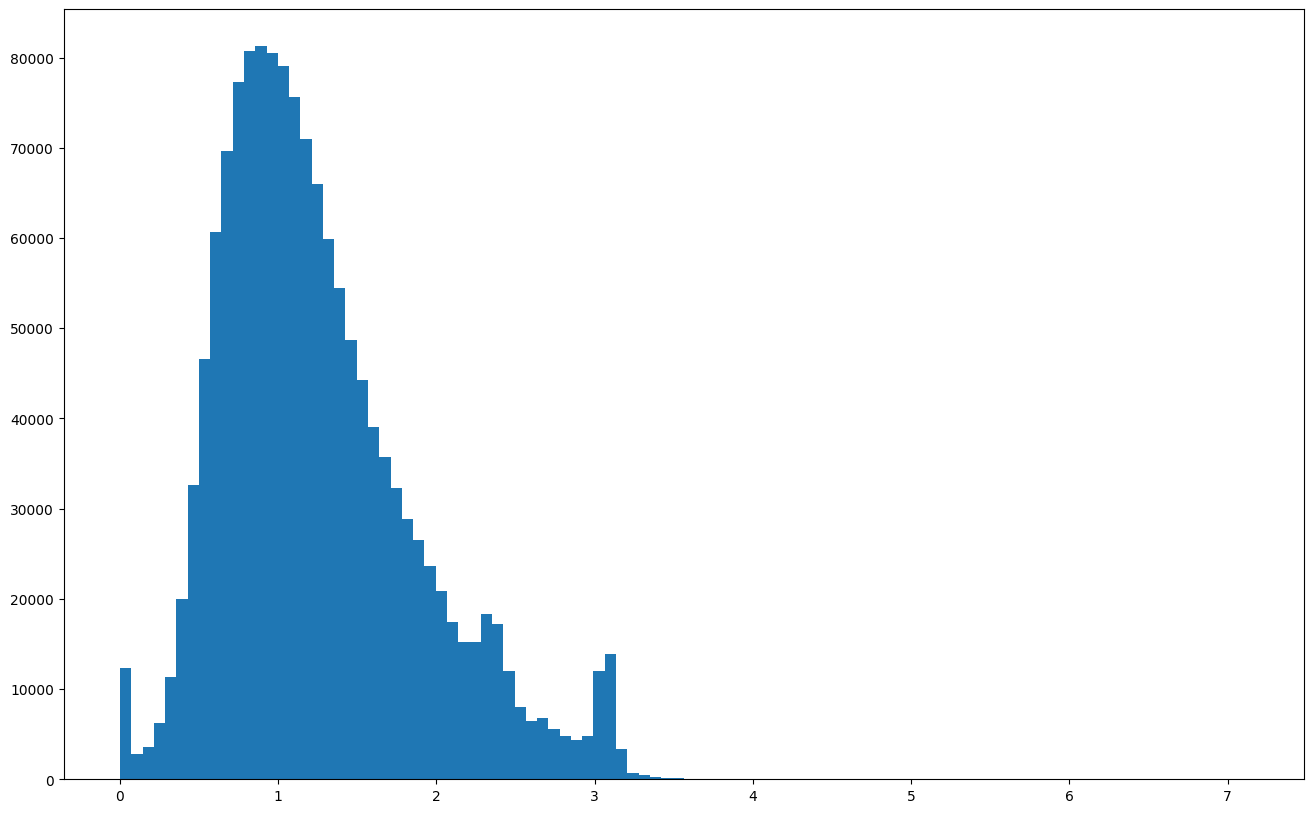

In [ ]:
plt.hist(np.log1p(train.distance_haversine), bins=100)
plt.show()

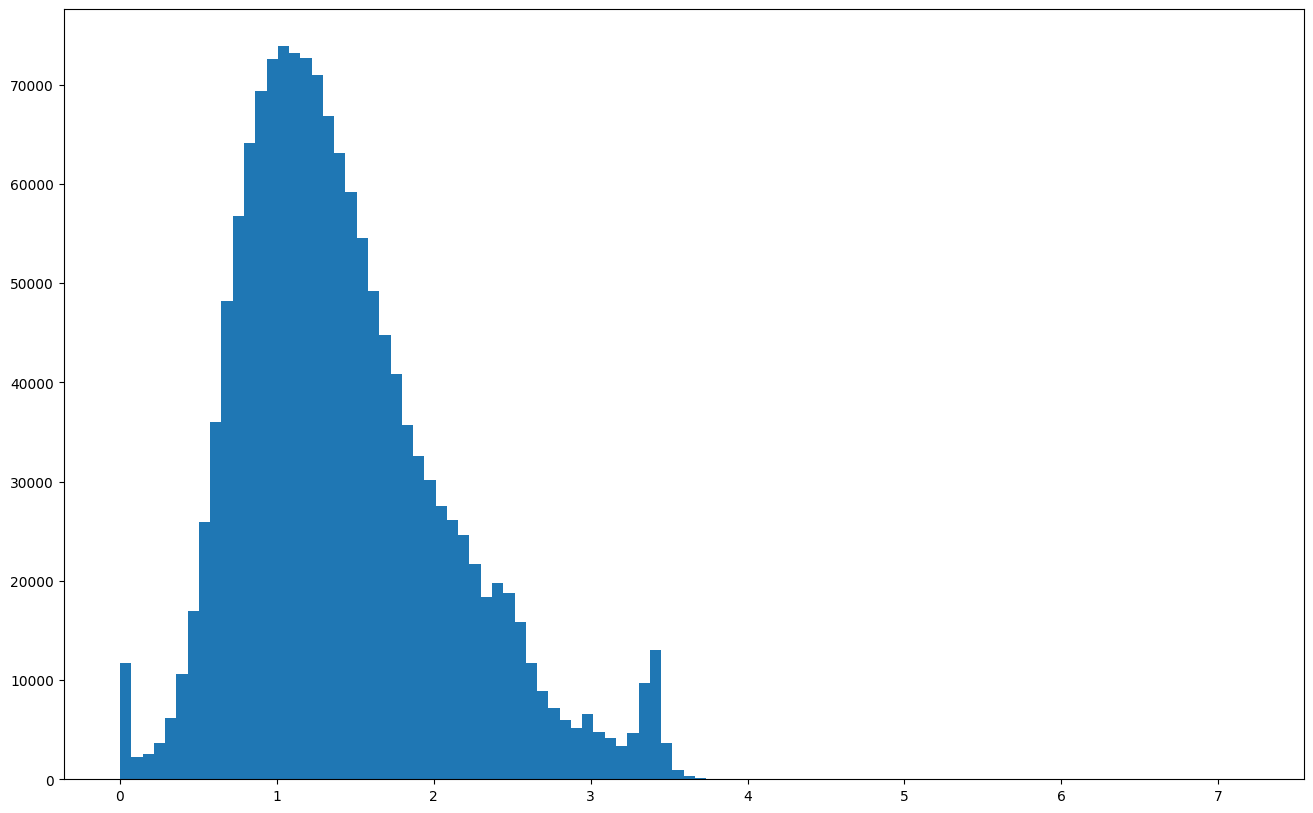

In [ ]:
plt.hist(np.log1p(train.distance_dummy_manhattan), bins=100)
plt.show()

Выглядят достаточно одинаково.

Поисследуем теперь связь между расстоянием и продолжительностью поездки.

Text(0, 0.5, 'trip duration')

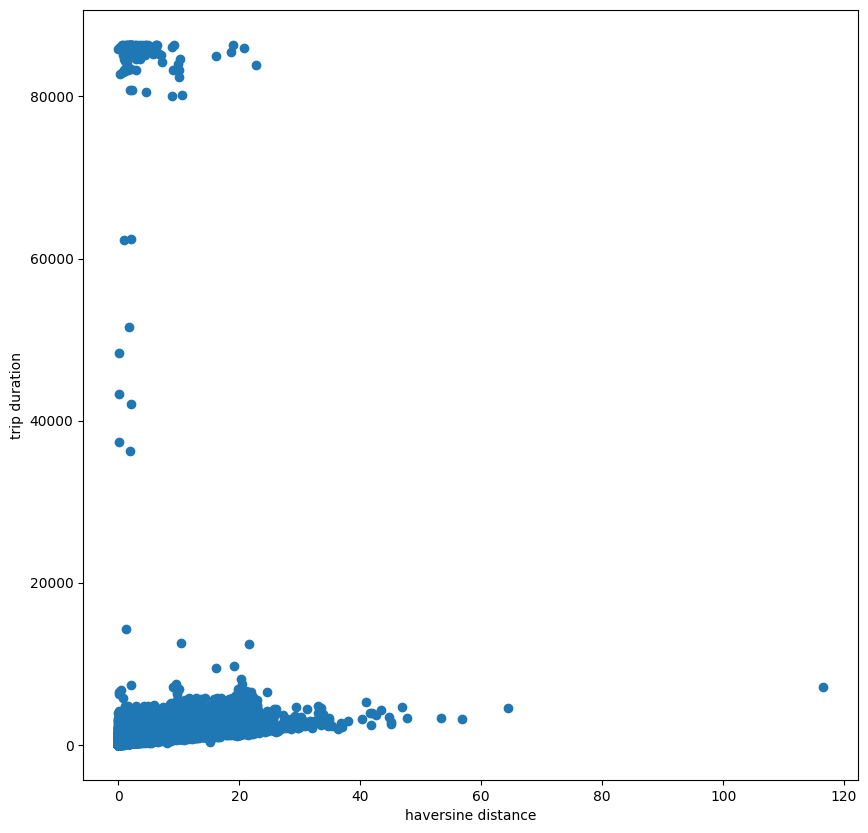

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(train.distance_haversine[:100000], train.trip_duration[:100000], marker='o')
plt.xlabel('haversine distance')
plt.ylabel('trip duration')

В нижней части графика точки неплохо выстраиваются в линию, но ещё есть некоторое количество выбросов. Нарисуем тот же график без них.

Text(0, 0.5, 'trip duration')

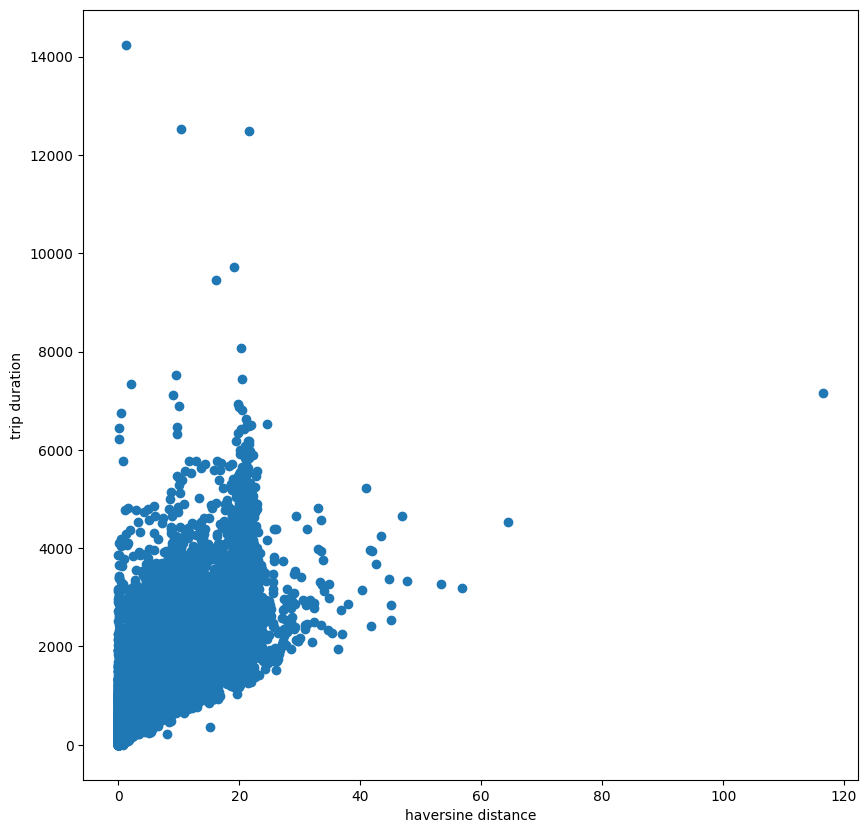

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(train[train.trip_duration < 20000].distance_haversine[:100000],
            train[train.trip_duration < 20000].trip_duration[:100000], marker='o')
plt.xlabel('haversine distance')
plt.ylabel('trip duration')

Кажется, тут вполне может сработать линейная регрессия!

Ещё раз напомним, что расстояние не может быть признаком, его не посчитать для тестовой выборки. Но мы пока просто играемся.

In [ ]:
from sklearn import linear_model, metrics

In [ ]:
train_filtered = train[train.trip_duration < 20000]
X = train_filtered.distance_haversine.values[:, np.newaxis]
y = train_filtered.trip_duration.values

regr = linear_model.Ridge()
regr.fit(X, y)
metrics.mean_absolute_error(regr.predict(X), y)

299.65921803397475

In [ ]:
train_filtered = train[train.trip_duration < 20000]
X = train_filtered.distance_dummy_manhattan.values[:, np.newaxis]
y = train_filtered.trip_duration.values

regr = linear_model.Ridge()
regr.fit(X, y)
metrics.mean_absolute_error(regr.predict(X), y)

306.0326596057465

То есть в среднем модель ошибается где-то на 300 секунд при предсказании продолжительности поездки. Как понять, хорошо это или плохо? Например, сравнить с качеством константной модели — например, которая всегда в качестве прогноза выдаёт медианное или среднее время поездки.

In [ ]:
metrics.mean_absolute_error(np.median(y) * np.ones(y.shape), y)

444.8109724449668

In [ ]:
metrics.mean_absolute_error(np.mean(y) * np.ones(y.shape), y)

468.0349997665766

### Почему важно исследовать данные?

Иногда бывает, что задача сложная, но при этом хорошего качества можно добиться с помощью простых правил. Причины могут быть разные:
* Разметка собрана по простому правилу. Например, для задачи предсказания тональности твитов могли сделать разметку через эмодзи — тогда достаточно, скажем, добавить признак "наличие в тексте подстроки ':)'".
* Задача действительно простая и не требует поиска закономерностей методами машинного обучения.
* В данных есть утечка (leak) — то есть в признаках содержится информация, которая на самом деле не должна быть доступна при построении прогноза.

Про некоторые истории с утечками можно почитать и посмотреть здесь:
* https://dyakonov.org/2018/06/28/простые-методы-анализа-данных/
* https://www.kaggle.com/c/the-icml-2013-whale-challenge-right-whale-redux/discussion/4865
* https://www.youtube.com/watch?v=UOxf2P9WnK8